In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
import gmaps
# Google developer API key
from config import gkey
from datetime import date
# Configure gmaps
gmaps.configure(api_key=gkey)
from pprint import pprint
import itertools
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as stats

In [2]:
#data provided by emily and harlan https://github.com/NABSA/gbfs/blob/master/systems.csv
census_df=pd.read_csv("acs2017_county_data.csv")
del census_df['Hispanic']
del census_df['White']
del census_df['Black']
del census_df['Native']
del census_df['Asian']
del census_df['Pacific']
del census_df['Professional']
list(census_df.columns)
census_df['Service'].values

array([18. , 18.2, 16.8, ..., 21.2, 26. , 20.2])

In [38]:
census_df.loc[census_df['County']=='Clay County']

,CountyId,State,County,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
13,1027,Alabama,Clay County,13407,6471,6936,10332,37287,6507,21330,...,2.8,0.6,3.0,30.3,5509,77.8,14.5,7.7,0.0,6.4
121,5021,Arkansas,Clay County,15190,7421,7769,11802,32219,2195,19171,...,3.1,0.5,1.9,23.3,6234,80.6,11.5,7.9,0.0,5.3
329,12019,Florida,Clay County,203291,100119,103172,149644,61971,1829,28599,...,1.1,1.9,5.4,33.3,91705,82.1,14.1,3.8,0.1,8.1
416,13061,Georgia,Clay County,3024,1495,1529,2312,23315,4341,14559,...,0.0,0.0,3.9,29.6,865,74.7,19.1,6.2,0.0,20.3
607,17025,Illinois,Clay County,13393,6602,6791,10402,47427,3055,25700,...,1.2,1.3,2.5,20.6,6348,81.5,11.8,6.7,0.0,5.0
707,18021,Indiana,Clay County,26375,12903,13472,20216,50924,2157,24339,...,1.8,1.0,2.2,26.2,12252,79.1,15.5,5.4,0.0,4.9
809,19041,Iowa,Clay County,16387,8091,8296,12485,48978,4257,28514,...,2.1,1.7,6.6,16.3,8247,80.6,10.3,8.8,0.2,3.4
901,20027,Kansas,Clay County,8203,4051,4152,6200,55434,5158,28115,...,2.3,0.8,6.4,19.7,4107,71.0,20.3,8.5,0.3,3.3
1018,21051,Kentucky,Clay County,20866,11054,9812,16297,24596,2434,15388,...,2.6,2.1,2.3,29.5,5762,74.0,22.6,3.2,0.3,9.1
1327,27027,Minnesota,Clay County,62040,30613,31427,46089,61409,1749,28122,...,4.0,1.5,6.3,18.9,33502,79.6,14.6,5.5,0.2,2.8


In [5]:
max(census_df['IncomePerCap'])

69529

In [3]:
w = census_df['IncomePerCap']
w

0       27824
1       29364
2       17561
3       20911
4       22021
        ...  
3215    10197
3216    11136
3217    10449
3218     8672
3219     8124
Name: IncomePerCap, Length: 3220, dtype: int64

In [6]:
c = census_df['County']
c

0            Autauga County
1            Baldwin County
2            Barbour County
3               Bibb County
4             Blount County
               ...         
3215    Vega Baja Municipio
3216      Vieques Municipio
3217     Villalba Municipio
3218      Yabucoa Municipio
3219        Yauco Municipio
Name: County, Length: 3220, dtype: object

In [7]:
wc = list(zip(c,w))
wc

[('Autauga County', 27824),
 ('Baldwin County', 29364),
 ('Barbour County', 17561),
 ('Bibb County', 20911),
 ('Blount County', 22021),
 ('Bullock County', 20856),
 ('Butler County', 19004),
 ('Calhoun County', 23638),
 ('Chambers County', 22002),
 ('Cherokee County', 23010),
 ('Chilton County', 23368),
 ('Choctaw County', 20994),
 ('Clarke County', 20765),
 ('Clay County', 21330),
 ('Cleburne County', 20873),
 ('Coffee County', 26216),
 ('Colbert County', 23675),
 ('Conecuh County', 16337),
 ('Coosa County', 20342),
 ('Covington County', 22431),
 ('Crenshaw County', 21580),
 ('Cullman County', 21857),
 ('Dale County', 23194),
 ('Dallas County', 18248),
 ('DeKalb County', 20020),
 ('Elmore County', 26251),
 ('Escambia County', 18164),
 ('Etowah County', 22278),
 ('Fayette County', 21191),
 ('Franklin County', 19314),
 ('Geneva County', 21084),
 ('Greene County', 14197),
 ('Hale County', 20269),
 ('Henry County', 23983),
 ('Houston County', 24781),
 ('Jackson County', 20946),
 ('Jeffers

In [47]:
county_run = random.choices(wc, k=50)


In [48]:
county = county_run.copy()

In [49]:
county

[('Bell County', 25017),
 ('Fulton County', 18111),
 ('Gunnison County', 27669),
 ('Ashley County', 20703),
 ('Carson County', 31788),
 ('Broadwater County', 32268),
 ('Marion County', 21835),
 ('Stephens County', 21657),
 ('Lyon County', 30203),
 ('Carroll County', 23690),
 ('Decatur County', 21098),
 ('Sunflower County', 14427),
 ('Richmond County', 33922),
 ('Williamson County', 48482),
 ('Indiana County', 25014),
 ('Franklin County', 31199),
 ('Conway County', 22365),
 ('Hardee County', 18643),
 ('Buncombe County', 29590),
 ('Denver County', 38991),
 ('Lincoln County', 24029),
 ('Beaver County', 29162),
 ('Eaton County', 30064),
 ('Glacier County', 16737),
 ('Newton County', 18053),
 ('Polk County', 27993),
 ('Bristol city', 21589),
 ('Clark County', 26219),
 ('Shenandoah County', 27016),
 ('Lackawanna County', 27258),
 ('Upton County', 25290),
 ('Davis County', 28293),
 ('Dodge County', 27000),
 ('Fresno County', 22234),
 ('Snyder County', 24961),
 ('Flagler County', 25741),
 ('Le

In [50]:
new_df = list(zip(*county))

# list(new_df)
final_df = pd.DataFrame(new_df)
final_df = final_df.T

# final_df['County'] = pd.DataFrame(new_df[0])
# final_df['Mean Walk']=new_df[1]
final_df
# unzipped_list_df = pd.DataFrame(list(df))
# unzipped_list_df
# cw_df = unzipped_list_df.T
# cw_df
# cw_df['County']=cw_df[0]
# cw_df['Mean Walk']=cw_df[1]
# del cw_df[0]
# del cw_df[1]
# # unzipped_list['Walk']=unzipped_list[1]
# # unzipped_list




,0,1
0,Bell County,25017
1,Fulton County,18111
2,Gunnison County,27669
3,Ashley County,20703
4,Carson County,31788
5,Broadwater County,32268
6,Marion County,21835
7,Stephens County,21657
8,Lyon County,30203
9,Carroll County,23690


In [51]:
county_list = final_df[0]
county = county_list.sort_values(ascending = True, inplace = False)
county


3         Ashley County
44       Bannock County
21        Beaver County
0           Bell County
26         Bristol city
5     Broadwater County
18      Buncombe County
9        Carroll County
4         Carson County
27         Clark County
16        Conway County
31         Davis County
10       Decatur County
19        Denver County
32         Dodge County
22         Eaton County
35       Flagler County
15      Franklin County
33        Fresno County
1         Fulton County
23       Glacier County
46        Gordon County
2       Gunnison County
17        Hardee County
43        Hopewell city
14       Indiana County
29    Lackawanna County
49    Lauderdale County
36         Lewis County
20       Lincoln County
8           Lyon County
40       Malheur County
6         Marion County
41      Marshall County
42        Mercer County
24        Newton County
48         Ocean County
25          Polk County
38      Prentiss County
12      Richmond County
28    Shenandoah County
34        Snyder

In [52]:
walk = final_df[1]
walk

0     25017
1     18111
2     27669
3     20703
4     31788
5     32268
6     21835
7     21657
8     30203
9     23690
10    21098
11    14427
12    33922
13    48482
14    25014
15    31199
16    22365
17    18643
18    29590
19    38991
20    24029
21    29162
22    30064
23    16737
24    18053
25    27993
26    21589
27    26219
28    27016
29    27258
30    25290
31    28293
32    27000
33    22234
34    24961
35    25741
36    23853
37    26717
38    19016
39    20600
40    17567
41    25693
42    21698
43    22668
44    23872
45    12722
46    21208
47    31301
48    33312
49    17178
Name: 1, dtype: object

In [53]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# # not assume equal population variance
# stats.ttest_ind(walk, county, equal_var=False)

<function matplotlib.pyplot.show(*args, **kw)>

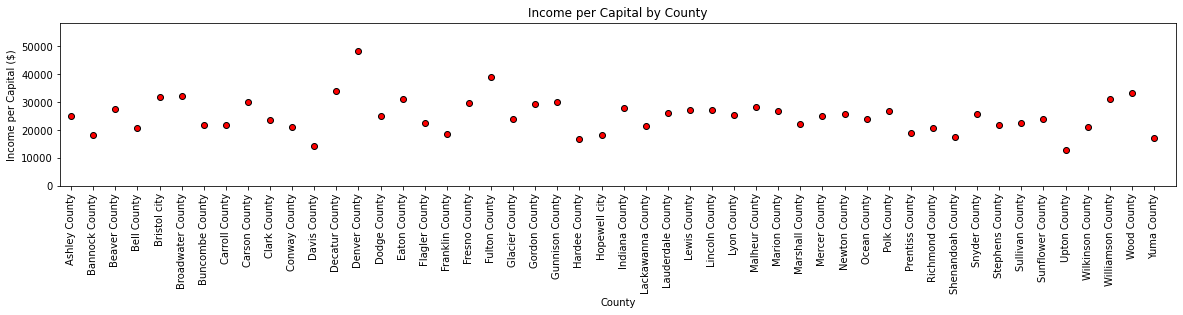

In [54]:
fig = plt.figure(figsize=(20,3))
plt.scatter(county, walk, marker="o", facecolors="red", edgecolors="black")
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(walk)+10000)
x_axis = np.arange(len(county))
plt.title("Income per Capital by County")
plt.xlabel("County")
plt.ylabel("Income per Capital ($)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('income_per_cap_county.png')
plt.show

Text(0, 0.5, 'Mean Walk Time (Minutes))')

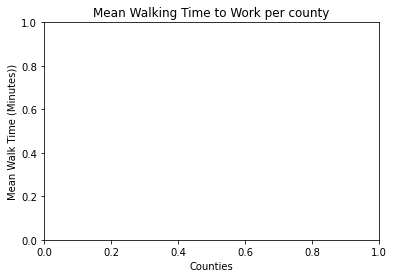

In [50]:
max(w)

59.2

In [8]:
#getting latitudes and longitudes for city as well as coordinates of bird scooters in each cities
# coord_length=[]
# lat_list=[]
# lon_list=[]
# all_url=data_scoot["Auto-Discovery URL"]
# # type(all_url)
# data_json = []
# city_list = []
# x = 0

# for i, row in data_scoot.iterrows():
    
#     # print(base_url)
#     base_url= row['Auto-Discovery URL']
#     cities = row['Location']
#     print(f'running record {x} on {cities}')
    
#     data = requests.get(base_url).json()
#     #print(data)
#     target_url=data["data"]["en"]["feeds"][3]["url"]
#     #target_url
#     data_coord=requests.get(target_url).json()
#     data_geofence = (data_coord["data"]["geofencing_zones"][0])
#     data_json.append(data_geofence)
#     city_list.append(cities)
#     x = x+1
    


running record 0 on Alexandria, VA
running record 1 on Chicago, IL
running record 2 on Cleveland, OH
running record 3 on Columbus, OH
running record 4 on Culver City, CA
running record 5 on Detroit, MI
running record 6 on Fairfax, VA
running record 7 on Indianapolis,IN
running record 8 on Kansas City, MO
running record 9 on Los Angeles, CA
running record 10 on Louisville, KY
running record 11 on Portland, OR
running record 12 on San Francisco, CA
running record 13 on Tempe, AZ
running record 14 on Washington, DC


In [19]:
lat_list = []
lon_list = []
base_url= "https://mds.bird.co/gbfs/washington-dc/gbfs.json"
city = "Washington DC"
data = requests.get(base_url).json()
base_url1=data["data"]["en"]["feeds"][2]["url"]
result1 = requests.get(base_url1).json()
bike_coord = result1['data']['bikes']
print(f'There are {len(bike_coord)} bikes in {city}.')
for bike in bike_coord:
        
        # Add Lat info to list
        lat_list.append([bike][0]['lat'])
        lon_list.append([bike][0]['lon'])

There are 677 bikes in Washington DC.


In [20]:
city_bird_df = pd.DataFrame({'Lat':lat_list, 'Lon': lon_list})
city_bird_df['Operator'] = "Bird"
today = date.today()
city_bird_df['Date'] = today
city_bird_df.to_csv('WashingtonDC_Bird_Lat_Lon.csv')

In [6]:
# #To create city level dataframe
# df = pd.DataFrame(data_json)
# df["City"] = city_list
# df["Operator"] = "Bird"
# df


In [5]:
# #to get counts by operator manually
# count_list = []
# count_list.append(len(df["zone_area"][0]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][1]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][2]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][3]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][4]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][5]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][6]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][7]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][8]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][9]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][10]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][11]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][12]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][13]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][14]["coordinates"][0][0]))


In [7]:
# #To add city level count to df
# df["Count"] = count_list
# df

In [9]:
# #second and cleaner method
# zone_area = []
# for x in data_json:
#     zone_area.append(x['zone_area'])

# coord_list = []
# for x in zone_area:
#     coord_list.append(x["coordinates"][0][0])

# flat_list = list(itertools.chain(*coord_list))

# lat_list = []
# lon_list = []
# for x in flat_list:
#     lat_list.append(x[1])
#     lon_list.append(x[0])

In [8]:
# #Confirmed work -first method
# with open('bird_geofence.json', 'w') as json_file:
#     json.dump(data_json, json_file)

In [9]:
# #Confirmed work -first method
# # Open the existing json file for loading into a variable
# with open('bird_geofence.json', 'r') as f:
#   geo_fence = json.load(f)

# zone_area = []
# # Print each property of the object
# for x in geo_fence:
#   zone_area.append(x['zone_area'])

In [10]:
# #Confirmed work -first method
# with open('bird_zone_area.json', 'w') as json_file:
#     json.dump(zone_area, json_file)

In [11]:
# #Confirmed work -first method
# # Open the existing json file for loading into a variable
# with open('bird_zone_area.json', 'r') as f:
#   zone_area = json.load(f)

# coord_list = []

# # Print each property of the object
# for x in zone_area:  
#   coord_list.append(x["coordinates"][0][0])

In [12]:
# #Confirmed work -first method
# coord_list


# flat_list = list(itertools.chain(*coord_list))

# lat_list = []
# lon_list = []
# for x in flat_list:
#     lat_list.append(x[1])
#     lon_list.append(x[0])
# # print(len(coord_list))
# # for x in range[0:14]
# #     coord_list[x]
# #     coord_list[1]

# # for x in coord_list:
# #     coord_pairs = x[0]

# # coord_pairs

# # # for x in coord_pairs:
# # #     coord = x

# coord

In [9]:
geocleaned_df = pd.DataFrame({'Lat':lat_list, 'Lon': lon_list})
geocleaned_df['Operator'] = "Bird"
today = date.today()
geocleaned_df['Date'] = today
geocleaned_df
# geocleaned_df.to_csv('Geocode_Bird_Lat_Lon.csv')

,Lat,Lon,Operator,Date
0,38.994739,-77.041154,Bird,2021-05-17
1,38.994739,-77.041154,Bird,2021-05-17
2,38.893812,-76.909382,Bird,2021-05-17
3,38.799691,-77.028859,Bird,2021-05-17
4,38.827513,-77.030919,Bird,2021-05-17
5,38.854518,-77.021445,Bird,2021-05-17
6,38.871379,-77.040773,Bird,2021-05-17
7,38.875434,-77.045917,Bird,2021-05-17
8,38.885538,-77.056881,Bird,2021-05-17
9,38.888427,-77.060174,Bird,2021-05-17


In [102]:
#To save city level data to csv
# del df['geofencing_zone_id']
# del df['zone_area']
# df.rename(columns={'lat':'Lat', 'lon':'Lon'})
# df
# today = date.today()
# df['Date'] = today
# df
# df.to_csv('Bird_Lat_Lon.csv')

In [13]:


locations = list(zip(lat_list,lon_list))
locations



[(38.8410750557452, -77.0462917608619),
 (38.8404843680438, -77.0462132610711),
 (38.8404245554607, -77.0460353857972),
 (38.840014430543, -77.0458505729493),
 (38.8399816806208, -77.0460900103779),
 (38.8400817432697, -77.0464075109622),
 (38.8398865554896, -77.046506260789),
 (38.8396533679068, -77.0463002607689),
 (38.8395464305486, -77.0463094483482),
 (38.8389936178968, -77.0459098858054),
 (38.8387387425184, -77.0453988849437),
 (38.8384763052012, -77.0452707602149),
 (38.8381488047956, -77.0454354475582),
 (38.837797054927, -77.0454180106066),
 (38.8377273676733, -77.0453316357469),
 (38.8372303051062, -77.0453275730008),
 (38.8365146175192, -77.0451981354177),
 (38.8360828670702, -77.0450313852634),
 (38.8359139924492, -77.0451471350874),
 (38.8357794923006, -77.0450410726087),
 (38.8354234919065, -77.0450096349421),
 (38.8344794918108, -77.0447303226027),
 (38.8338003045673, -77.0444351348313),
 (38.833530616655, -77.0441737595344),
 (38.8335227418627, -77.0439773222803),
 (38

In [90]:
# locations = df[['lat','lon']]
# locations
# count = df["Count"]
# count

0     324
1     606
2      38
3      73
4      75
5      57
6      36
7     224
8     224
9      75
10     10
11     91
12      7
13    164
14     26
Name: Count, dtype: int64

In [15]:

#generating the heat map using the city(lat and lon values) with
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating = False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))